In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy

from simulation import run_simulation
from histograms import PairDens
from histograms import g_theoretical
#%load_ext autoreload
#%autoreload 2

In [3]:
n = 500 # Starting plankton population size.
iters = 1000 # Time steps.
L_max = 1.0 # Size of square domain.
pow_min = -8.0 # To reproduce the image, choose -8.0
pow_max = -2.0 # To reproduce the image, choose -2.0
dp = 0.2

plankton, _ = run_simulation(n, iters, L_max, True)
print(len(plankton))

r_list = []
pcf_dx_list = []
pcf_dp_list = []

for pow_i in np.arange(pow_min, pow_max + dp, dp):
    r_list.append(10**pow_i)
    pcf_dx, pcf_dp = PairDens(pow_i, dp, L_max, plankton)

    pcf_dx_list.append(pcf_dx)
    pcf_dp_list.append(pcf_dp)

220


In [4]:
# We scale the radii to have r/delta
radii = [i * 10**7 for i in r_list]

C_0 = n/1
gamma = 0.0264
g_test = g_theoretical(gamma, radii, C_0)-1

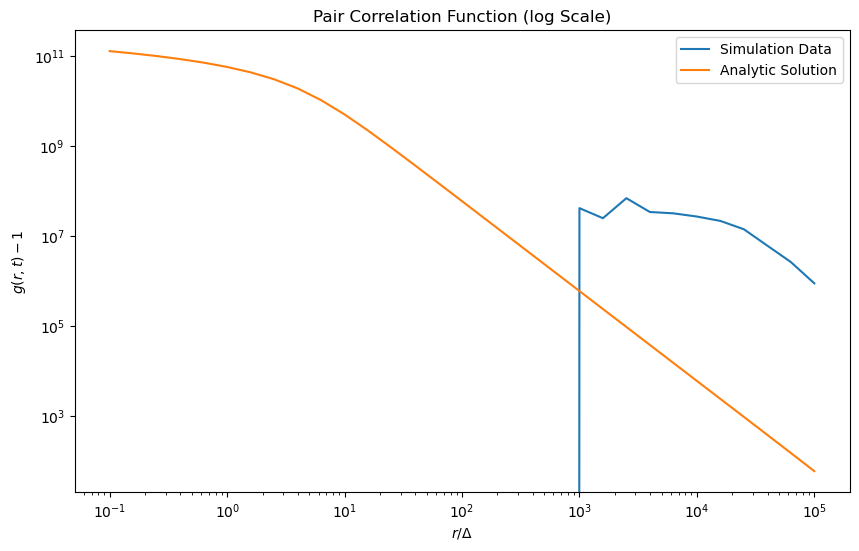

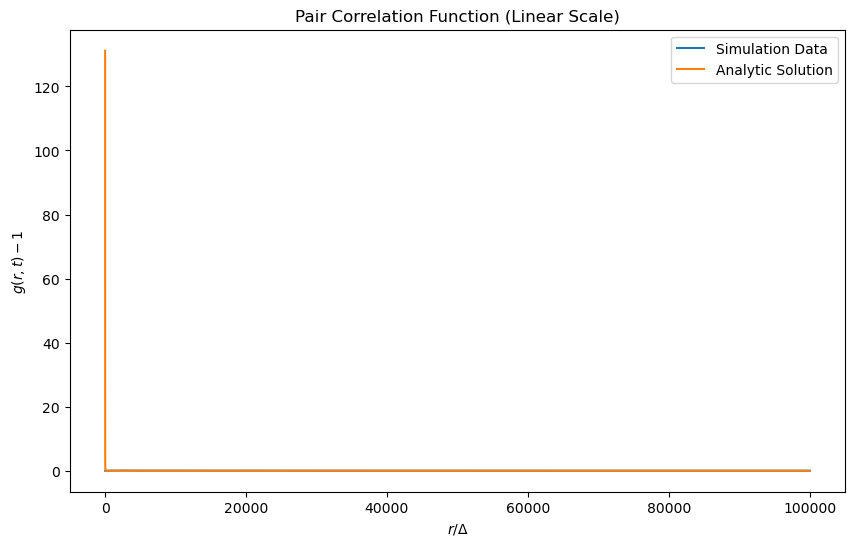

In [5]:
# Subtract 1 from pcf_dx_list for y-axis
plot_pcf_dx_list = np.array(pcf_dx_list) - 1

plt.figure(figsize=(10, 6))
plt.loglog(radii, plot_pcf_dx_list, label='Simulation Data')
plt.loglog(radii, g_test, label='Analytic Solution')

#plt.xlim(left=10**(2.3))

plt.xlabel(r'$r / \Delta$')
plt.ylabel(r'$g(r, t) - 1$')
plt.title('Pair Correlation Function (log Scale)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(radii, plot_pcf_dx_list/10**9, label='Simulation Data')
plt.plot(radii, g_test/10**9, label='Analytic Solution')

plt.xlabel(r'$r / \Delta$')
plt.ylabel(r'$g(r, t) - 1$')
plt.title('Pair Correlation Function (Linear Scale)')
plt.legend()
plt.show()